<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/InceptionV3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import datetime as dt

In [3]:
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard
log_dir='log/'
!rm -rf log/

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Kaggle/train'
valid_path = '/content/drive/My Drive/Kaggle/test'

In [5]:

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(3, activation='softmax')(x)

In [9]:
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 911 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 164 images belonging to 3 classes.


In [16]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))]

In [18]:
inception_v3_transfer_paddy = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
29/29 [==============================] - 853s 29s/step - loss: 1.8018 - accuracy: 0.7827 - val_loss: 1.7027 - val_accuracy: 0.7866
Epoch 2/10
29/29 [==============================] - 137s 5s/step - loss: 0.2589 - accuracy: 0.9440 - val_loss: 1.0360 - val_accuracy: 0.8537
Epoch 3/10
29/29 [==============================] - 137s 5s/step - loss: 0.1226 - accuracy: 0.9769 - val_loss: 0.8975 - val_accuracy: 0.9024
Epoch 4/10
29/29 [==============================] - 142s 5s/step - loss: 0.1131 - accuracy: 0.9737 - val_loss: 0.8707 - val_accuracy: 0.8780
Epoch 5/10
29/29 [==============================] - 138s 5s/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.8361 - val_accuracy: 0.8963
Epoch 6/10
29/29 [==============================] - 138s 5s/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.6613 - val_accuracy: 0.9024
Epoch 7/10
29/29 [==============================] - 138s 5s/step - loss: 0.0770 - accuracy: 0.9846 - val_loss: 1.0960 - val_accuracy: 0.8902
Epoch 8/10
2

In [21]:
import matplotlib.pyplot as plt

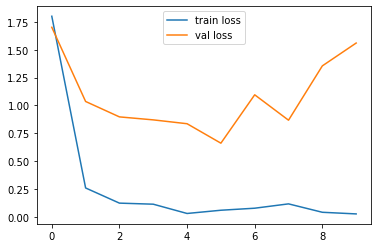

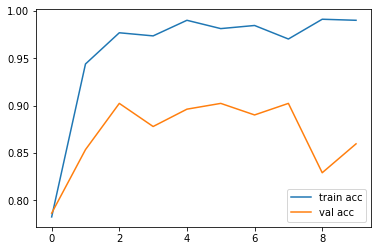

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(inception_v3_transfer_paddy.history['loss'], label='train loss')
plt.plot(inception_v3_transfer_paddy.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(inception_v3_transfer_paddy.history['accuracy'], label='train acc')
plt.plot(inception_v3_transfer_paddy.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model
model.save('model_inceptionV3_paddy.h5')

In [25]:
y_pred = model.predict(test_set)

In [26]:
y_pred

array([[1.00000000e+00, 3.82342649e-18, 2.40649075e-16],
       [1.65665748e-09, 1.74372520e-13, 1.00000000e+00],
       [1.00000000e+00, 2.07290143e-10, 8.03445366e-10],
       [1.00000000e+00, 5.36112387e-13, 4.27901987e-15],
       [1.00000000e+00, 1.82190352e-12, 3.05016538e-16],
       [1.26636913e-25, 9.81738508e-01, 1.82614736e-02],
       [1.00000000e+00, 2.03851371e-08, 5.54288455e-11],
       [2.27084553e-20, 9.98515785e-01, 1.48422772e-03],
       [9.99928713e-01, 4.83312579e-05, 2.30526384e-05],
       [1.82513920e-23, 7.84785114e-03, 9.92152154e-01],
       [1.15987178e-14, 4.47586062e-05, 9.99955297e-01],
       [1.00000000e+00, 5.53181598e-11, 4.56425786e-10],
       [1.71413121e-05, 3.07420311e-10, 9.99982834e-01],
       [1.00000000e+00, 9.83225654e-13, 2.96499039e-08],
       [3.40070009e-20, 1.00000000e+00, 8.88452520e-15],
       [1.00000000e+00, 2.00289564e-18, 2.16402174e-16],
       [1.00000000e+00, 2.43416870e-10, 3.05279535e-09],
       [4.38703961e-27, 9.16033

In [27]:
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([0, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2,
       0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 1, 2, 2, 0, 1, 0, 1])